In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast,AutoTokenizer

C:\Users\mural\Envs\ML\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Full_Data_With_Perturbed_text.csv")

In [4]:
df.head()

,Question,Text,LabelName,Label,Perturbed Text
0,"Why is every book I hear about a "" NY Times # ...","Basically there are many categories of "" Best ...",Human Answer,0,"Basically there are many categories of "" Best ..."
1,"Why is every book I hear about a "" NY Times # ...","If you 're hearing about it , it 's because it...",Human Answer,0,"If you 're hearing about it , this 's because ..."
2,"Why is every book I hear about a "" NY Times # ...","One reason is lots of catagories . However , h...",Human Answer,0,book list ). There are a variety of catagories...
3,"Why is every book I hear about a "" NY Times # ...",There are many different best seller lists tha...,ChatGPT Answer,1,"list list, there are many different best selle..."
4,"If salt is so bad for cars , why do we use it ...",salt is good for not dying in car crashes and ...,Human Answer,0,salt is good for not dying in car crashes and ...


In [5]:
len(df)

796

In [6]:
df = df[df['Perturbed Text'].notna()] #Dropping Text Sequence With Length less than 512

In [7]:
len(df) #Available Samples for Training and Testing

765

In [8]:
df.dtypes


Question          object
Text              object
LabelName         object
Label              int64
Perturbed Text    object
dtype: object

In [9]:
df.head()

,Question,Text,LabelName,Label,Perturbed Text
0,"Why is every book I hear about a "" NY Times # ...","Basically there are many categories of "" Best ...",Human Answer,0,"Basically there are many categories of "" Best ..."
1,"Why is every book I hear about a "" NY Times # ...","If you 're hearing about it , it 's because it...",Human Answer,0,"If you 're hearing about it , this 's because ..."
2,"Why is every book I hear about a "" NY Times # ...","One reason is lots of catagories . However , h...",Human Answer,0,book list ). There are a variety of catagories...
3,"Why is every book I hear about a "" NY Times # ...",There are many different best seller lists tha...,ChatGPT Answer,1,"list list, there are many different best selle..."
4,"If salt is so bad for cars , why do we use it ...",salt is good for not dying in car crashes and ...,Human Answer,0,salt is good for not dying in car crashes and ...


In [10]:
sum(df['Label'])

199

-------------------------------------------------------------------------------------------------------------------

##### Adding Separator Token to Data

In [11]:
sep = " [SEP] "

data = pd.DataFrame(columns = ["Question", "Text", "LabelName", "Label","Pertubed Text", "Final Text"])

for idx, row in df.iterrows():
    temp_question = row['Question']
    temp_text = row['Text']
    temp_label_name = row['LabelName']
    temp_label = row['Label']
    temp_pert_text = row['Perturbed Text']
    temp_final_text = temp_text + sep + temp_pert_text
    
    df_temp = {'Question': temp_question, 'Text': temp_text, 'LabelName': temp_label_name,'Label':temp_label,'Pertubed Text':temp_pert_text,'Final Text':temp_final_text}
    data = data.append(df_temp, ignore_index = True)

C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = Tr

C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = Tr

C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = Tr

C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = True)
C:\Users\mural\AppData\Local\Temp\ipykernel_26076\879718482.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_temp, ignore_index = Tr

In [12]:
data.head()

,Question,Text,LabelName,Label,Pertubed Text,Final Text
0,"Why is every book I hear about a "" NY Times # ...","Basically there are many categories of "" Best ...",Human Answer,0,"Basically there are many categories of "" Best ...","Basically there are many categories of "" Best ..."
1,"Why is every book I hear about a "" NY Times # ...","If you 're hearing about it , it 's because it...",Human Answer,0,"If you 're hearing about it , this 's because ...","If you 're hearing about it , it 's because it..."
2,"Why is every book I hear about a "" NY Times # ...","One reason is lots of catagories . However , h...",Human Answer,0,book list ). There are a variety of catagories...,"One reason is lots of catagories . However , h..."
3,"Why is every book I hear about a "" NY Times # ...",There are many different best seller lists tha...,ChatGPT Answer,1,"list list, there are many different best selle...",There are many different best seller lists tha...
4,"If salt is so bad for cars , why do we use it ...",salt is good for not dying in car crashes and ...,Human Answer,0,salt is good for not dying in car crashes and ...,salt is good for not dying in car crashes and ...


<AxesSubplot: >

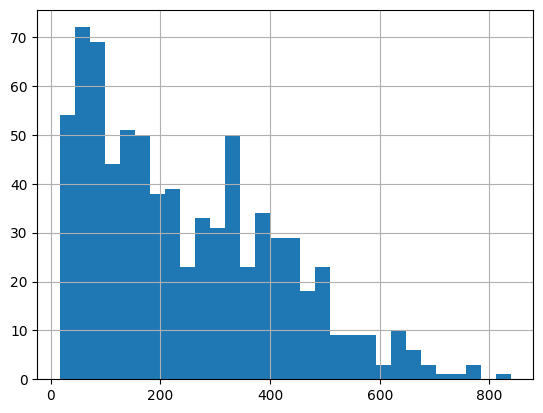

In [13]:
# Get average length of concated text
final_text_data = data["Final Text"]
seq_len = [len(i.split()) for i in final_text_data]

pd.Series(seq_len).hist(bins = 30)

In [14]:
# Spliting the data 

train_text, temp_text, train_labels, temp_labels = train_test_split(data['Final Text'], data['Label'], 
                                                                    random_state=0, 
                                                                    test_size=0.4, 
                                                                    stratify=data['Label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=0, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [15]:
# BERT tokenizer testing
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenizer.batch_encode_plus(["Thesis report for friday"], padding=True)

{'input_ids': [[101, 9459, 3189, 2005, 5958, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1]]}

In [16]:
#selecting sequence length, padding to meet the length of 512, and truncate the large ones

tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 400,
    pad_to_max_length=True,
    truncation=True
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 400,
    pad_to_max_length=True,
    truncation=True
)


tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 400,
    pad_to_max_length=True,
    truncation=True
)

C:\Users\mural\Envs\ML\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [17]:
#converting the input tokens to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [18]:
train_seq.size() # Input Tensor dimensions

torch.Size([459, 400])

In [19]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 6

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [20]:
#importing bert and freezing and the layers initial
bert = AutoModel.from_pretrained('bert-base-uncased')
# for param in bert.parameters():
#     param.requires_grad = False

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
#Defining the model architecture

class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        
        self.dropout = nn.Dropout(0.1)
        
        # relu activation function
        
        self.relu =  nn.ReLU()
        
        # dense layer 1
        
        self.fc1 = nn.Linear(768,512)
        
        # dense layer 2 (Output layer)
        
        self.fc2 = nn.Linear(512,2)
        
        #softmax activation function
        
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        
        _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
        
        x = self.fc1(cls_hs)
        
        x = self.relu(x)
        
        x = self.dropout(x)
        
        # output layer
        x = self.fc2(x)
        
        # apply softmax activation
        
        x = self.softmax(x)
        
        return x

In [22]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

device = torch.device("cuda")

# push the model to GPU
model = model.to(device)

In [23]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)          # learning rate

C:\Users\mural\Envs\ML\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [24]:
#Define loss function

cross_entropy  = nn.CrossEntropyLoss()

In [25]:
# function to train the model
def train():
    
    model.train()
    
    total_loss, total_accuracy = 0, 0
    
    # empty list to save model predictions
    
    total_preds=[]
    
    # iterate over batches
    
    for step,batch in enumerate(train_dataloader):
            
        # push the batch to gpu
        
        batch = [r.to(device) for r in batch]
        
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        
        model.zero_grad()        
        
        # get model predictions for the current batch
        
        preds = model(sent_id, mask)
        
        # compute the loss between actual and predicted values
        
        loss = cross_entropy(preds, labels)
        
        # add on to the total loss
        
        total_loss = total_loss + loss.item()
        
        # backward pass to calculate the gradients
        
        loss.backward()
        
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        # update parameters
        
        optimizer.step()
        
        # model predictions are stored on GPU. So, push it to CPU
        
        preds=preds.detach().cpu().numpy()
        
        # append the model predictions
        
        total_preds.append(preds)
        
        # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
        
        # predictions are in the form of (no. of batches, size of batch, no. of classes).
        # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)
        #returns the loss and predictions
        
    return avg_loss, total_preds

In [26]:
def evaluate():    
    # deactivate dropout layers
    model.eval()
    
    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    
    total_preds = []
    
    # iterate over batches
    
    for step,batch in enumerate(val_dataloader):
            
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
        
            # compute the validation loss between actual and predicted values
        
            loss = cross_entropy(preds,labels)
        
            total_loss = total_loss + loss.item()
        
            preds = preds.detach().cpu().numpy()
        
            total_preds.append(preds)
        
        # compute the validation loss of the epoch
            
    avg_loss = total_loss / len(val_dataloader) 
    
    # reshape the predictions in form of (number of samples, no. of classes)
        
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [27]:
epochs = 3

In [28]:
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bert_v1_perttext.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 3

Training Loss: 0.378
Validation Loss: 0.188

 Epoch 2 / 3

Training Loss: 0.050
Validation Loss: 0.060

 Epoch 3 / 3

Training Loss: 0.016
Validation Loss: 0.147


---------------------------------------Testing-----------------------------------------------------------------

In [29]:
def test():    
    # deactivate dropout layers
    model.eval()
    
    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    
    total_preds = []
    total_ground_truth = []
    # iterate over batches
    
    for step,batch in enumerate(test_dataloader):
            
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
        
            # compute the validation loss between actual and predicted values
        
            loss = cross_entropy(preds,labels)
        
            total_loss = total_loss + loss.item()
        
            preds = preds.detach().cpu().numpy()
        
            total_preds.append(preds)
            total_ground_truth.append(labels)
        
        # compute the testing loss of each batch
            
    avg_loss = total_loss / len(test_dataloader) 
    
    # reshape the predictions in form of (number of samples, no. of classes)
        
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [30]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 1

# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_y)

# sampler for sampling the data during testing
test_sampler = SequentialSampler(test_data)

# dataLoader for test set
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [31]:
average_loss, total_preds = test()

In [32]:
print("Testing Loss: ",average_loss)

Testing Loss:  0.15998701749406025


In [33]:
preds = np.argmax(total_preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       113
           1       0.89      1.00      0.94        40

    accuracy                           0.97       153
   macro avg       0.94      0.98      0.96       153
weighted avg       0.97      0.97      0.97       153

